# Cancer Type Prediction Model



# Importing the Libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [3]:
#Importing the Dataset
df = pd.read_csv('Cancer_Data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# Assuming your DataFrame is named 'data'
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
df = df.drop(columns=['id', 'Unnamed: 32'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Exploration of the data 

In [5]:
#Shape Of the Dataset
df.shape

(569, 31)

In [6]:
#Datatype of the data
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
#Gives a whole descriptive analyses about the dataset
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


As can be seen there are few columns like [concavity_mean,concave points_mean, concavity_worst, concave points_worst] which has minimum values as zero which can not be possible to be exact zero

# Cleansing of the data

In [9]:
df.drop_duplicates()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
df.shape
#As there is no change in shape so there were no duplicates

(569, 31)

In [11]:
#checking the null values 
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
#Checking The zeros in the columns
df[df['concavity_mean']==0].shape[0]

13

In [13]:
df[df['concave points_mean']==0].shape[0]

13

In [14]:
df[df['concavity_worst']==0].shape[0]

13

In [15]:
df[df['concave points_worst']==0].shape[0]

13

In [16]:
df['concavity_mean']=df['concavity_mean'].replace(0,df['concavity_mean'].mean())
df['concave points_mean']=df['concave points_mean'].replace(0,df['concave points_mean'].mean())
df['concavity_worst']=df['concavity_worst'].replace(0,df['concavity_worst'].mean())
df['concave points_worst']=df['concave points_worst'].replace(0,df['concave points_worst'].mean())

In [17]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.090828,0.050037,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.278407,0.117225,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.078553,0.038074,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.204425,0.063350,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000692,0.001852,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.001845,0.008772,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.031360,0.021070,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.124200,0.066960,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.066640,0.037000,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.241300,0.104700,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Now can be seen there is no zeros in the dataset


# Data Visualisation

<Axes: ylabel='diagnosis'>

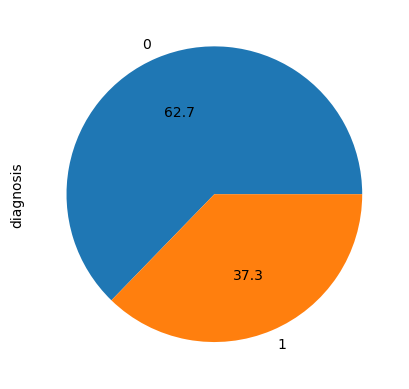

In [18]:
#Piechart
df['diagnosis'].value_counts().plot.pie(autopct='%.1f')

The PieChart shows that the it is "IMBALANCED" because there is a high margin between 1[M(Malignant)] And 0[B(Benign)]

0    357
1    212
Name: diagnosis, dtype: int64

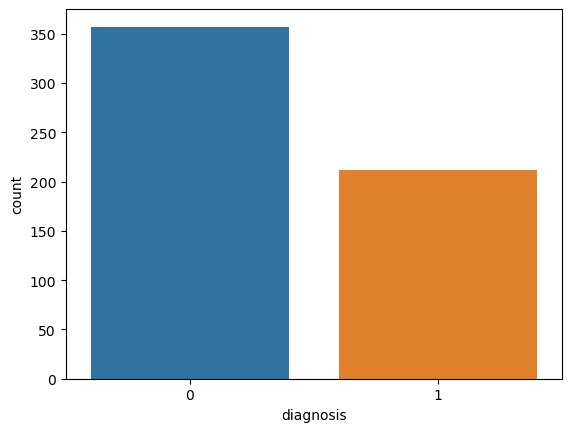

In [19]:
#Countplot
sns.countplot(x='diagnosis', data=df)
df['diagnosis'].value_counts()

To visualize and see the count of DIAGNOSIS


<Axes: >

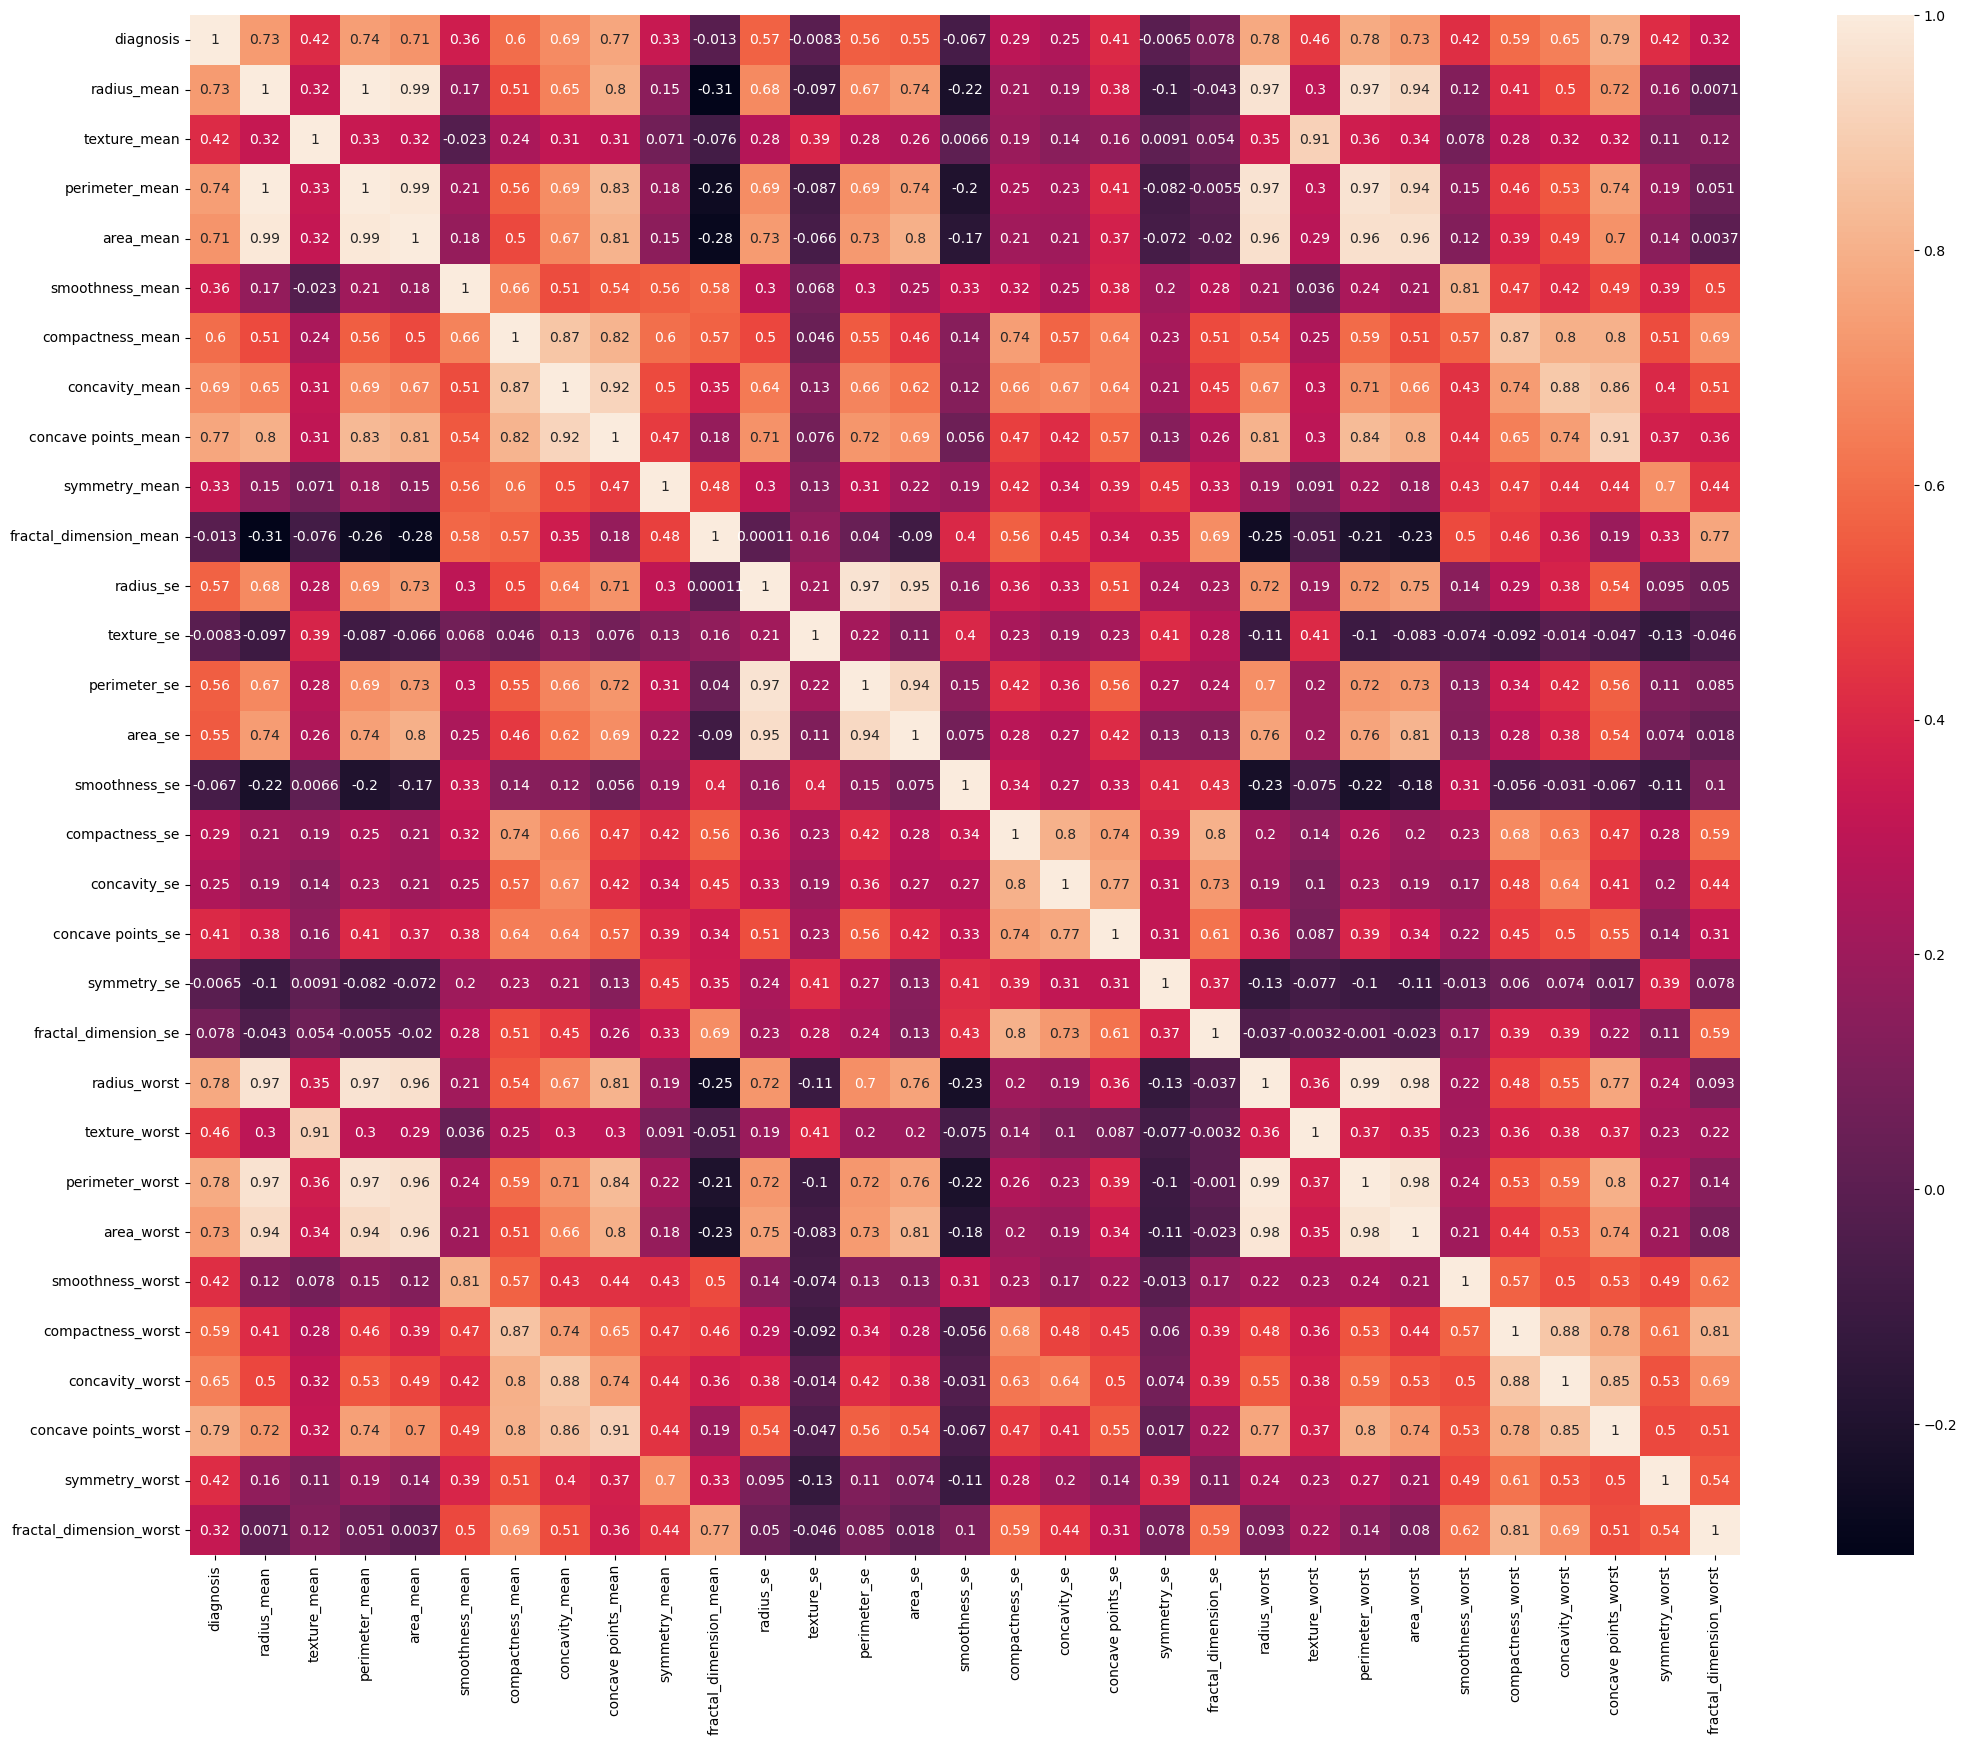

In [20]:
#Heatmap To observe the correlation with diagnosis
corr = df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr,annot=True)

Heatmap is to analys which column have a strong correlation with Diagnosis like the correlation with Diagnosis is [compactness_worst] and the least is [texture_se]

# Spliting the Dataset into X and Y

In [21]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


In [22]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(SSX , y , test_size = 0.2 ,random_state = 7)

In [26]:
X_train.shape,y_train.shape

((455, 30), (455,))

In [27]:
X_test.shape,y_test.shape

((114, 30), (114,))

# Model Training 

In [29]:
log_reg_model = LogisticRegression()
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
log_reg_model.fit(X_train, y_train)


LogisticRegression()

In [34]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [35]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predictions

In [69]:
log_reg_pred = log_reg_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
print("Prediction of Logistic regression is"'\n''\n', log_reg_pred)
print('\n''\n'"Prediction of Decision Tree  is"'\n''\n', dt_pred)
print('\n''\n'"Prediction of Random Forest is"'\n''\n', rf_pred)

Prediction of Logistic regression is

 [0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0]


Prediction of Decision Tree  is

 [0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0]


Prediction of Random Forest is

 [0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0]


# Accuracy Of the Models

In [96]:
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)*100
dt_accuracy = accuracy_score(y_test, dt_pred)*100
rf_accuracy = accuracy_score(y_test, rf_pred)*100
print('Logistic Regression Accuracy is' , log_reg_accuracy)
print('Decision Tree Accuracy is' , dt_accuracy)
print('Random Forest Accuracy is' , rf_accuracy)

Logistic Regression Accuracy is 98.24561403508771
Decision Tree Accuracy is 93.85964912280701
Random Forest Accuracy is 96.49122807017544


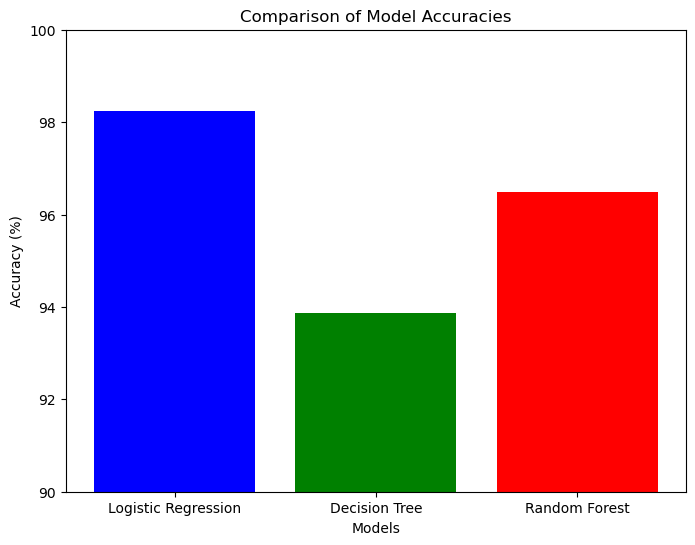

In [106]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [log_reg_accuracy, dt_accuracy, rf_accuracy]
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(90, 100) 
plt.show()

# Classification reports

In [47]:
log_reg_report = classification_report(y_test, log_reg_pred)
dt_report = classification_report(y_test, dt_pred)
rf_report = classification_report(y_test, rf_pred)

In [54]:
print('Classification report of Logistic regression is::::' '\n' '\n', log_reg_report)
print('\n''Classification report of Decision Tree is::::' '\n' '\n', dt_report)
print( '\n''Classification report of Random Forest is::::' '\n' '\n', rf_report)

Classification report of Logistic regression is::::

               precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114


Classification report of Decision Tree is::::

               precision    recall  f1-score   support

           0       0.95      0.96      0.95        74
           1       0.92      0.90      0.91        40

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Classification report of Random Forest is::::

               precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.90      0.95        40

    accuracy                  

# Confusion Matrix of the models


In [70]:
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

In [56]:
print('Confusion Matrix of Logistic regression is::::' '\n' '\n', log_reg_cm)
print('\n''Confusion Matrix  of Decision Tree is::::' '\n' '\n', dt_cm)
print( '\n''Confusion Matrix  of Random Forest is::::' '\n' '\n', rf_cm)

Confusion Matrix of Logistic regression is::::

 [[74  0]
 [ 2 38]]

Confusion Matrix  of Decision Tree is::::

 [[71  3]
 [ 4 36]]

Confusion Matrix  of Random Forest is::::

 [[74  0]
 [ 4 36]]


# ROC Curve and AUC scores of models

In [76]:
#These lines compute predicted probabilities for positive class using logistic regression, decision tree, and random forest models.
log_reg_probs = log_reg_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [77]:
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

In [78]:
log_reg_auc = roc_auc_score(y_test, log_reg_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [79]:
log_reg_auc = roc_auc_score(y_test, log_reg_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print('AUC  score of Logistic regression is::::' '\n' '\n', log_reg_auc)
print('\n'' AUC  score of Decision Tree is::::' '\n' '\n', dt_auc)
print( '\n''AUC  score of Random Forest is::::' '\n' '\n', rf_auc)

AUC  score of Logistic regression is::::

 0.9972972972972973

 AUC  score of Decision Tree is::::

 0.9297297297297297

AUC  score of Random Forest is::::

 1.0


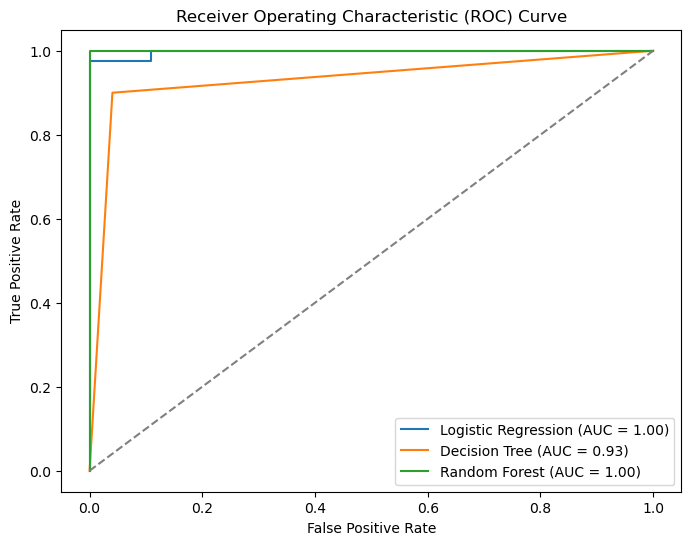

In [80]:
plt.figure(figsize=(8, 6))
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Output Summary

In [65]:
print("Logistic Regression Model:")
print("Accuracy:", log_reg_accuracy)
print("Classification Report:")
print(log_reg_report)
print("Confusion Matrix:")
print(log_reg_cm)
print("\n")

print("Decision Tree Model:")
print("Accuracy:", dt_accuracy)
print("Classification Report:")
print(dt_report)
print("Confusion Matrix:")
print(dt_cm)
print("\n")

print("Random Forest Model:")
print("Accuracy:", rf_accuracy)
print("Classification Report:")
print(rf_report)
print("Confusion Matrix:")
print(rf_cm)


Logistic Regression Model:
Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[74  0]
 [ 2 38]]


Decision Tree Model:
Accuracy: 0.9385964912280702
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        74
           1       0.92      0.90      0.91        40

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix:
[[71  3]
 [ 4 36]]


Random Forest Model:
Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score